In [1]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(EnhancedVolcano)
    library(ggrepel)
    library(patchwork)
})


In [2]:
data_path <- "/home/ubuntu/data/bioinfo_sm207"


In [3]:
zuma_res <- read.csv(file.path(data_path, "step05_zuma7_results.csv"), row.names = 1)
zuma_res


,P.value..Mann.Whitney.U.,Median.Ratio..Ongoing.vs..Other.,P.value..Log.rank.,Hazard.Ratio
,<dbl>,<dbl>,<dbl>,<dbl>
B.Memory,0.006920795,1.500967,0.014178830,1.872339e+00
B.Naive,0.070245105,2.005814,0.033032804,1.813571e+00
Basophils.LD,0.375662726,NA,0.515861964,7.418582e-01
MAIT,0.061977756,1.000000,0.140665788,5.566721e-01
mDCs,0.922726919,NA,0.908095493,9.668660e-01
Monocytes.C,0.411385035,NA,0.541688717,8.556158e-01
Monocytes.NC.I,0.283967246,1.000000,0.247964484,7.067490e-01
Neutrophils.LD,0.367196438,1.498551,0.478700652,1.192943e+00
NK,1.000000000,NA,NA,NA


In [4]:
zuma_res$celltype <- rownames(zuma_res)

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_text_repel()`).”


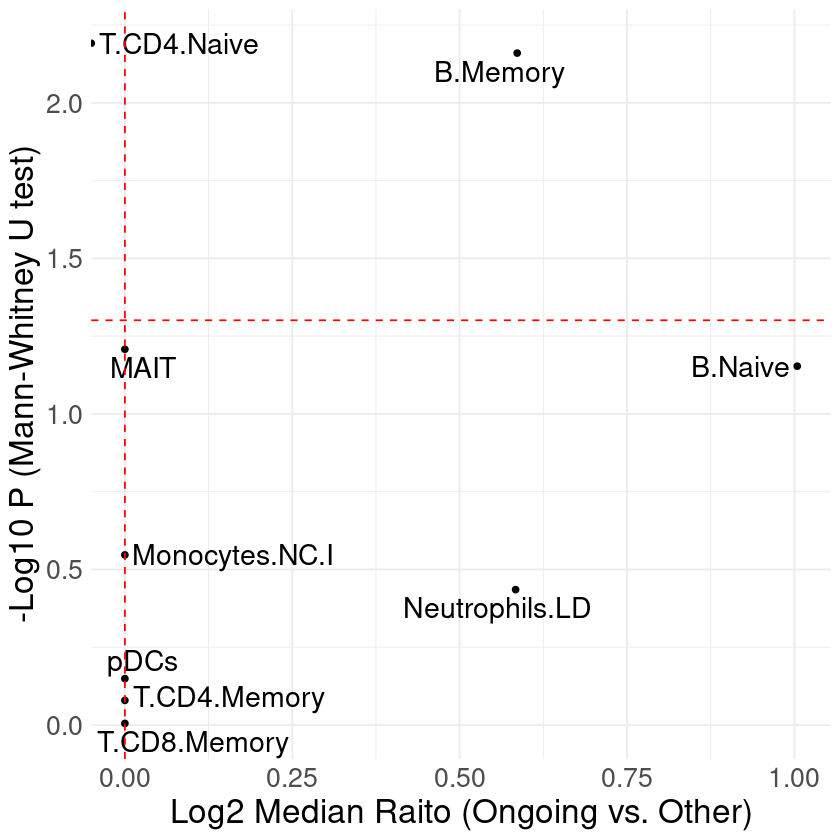

In [5]:
p1 <- ggplot(zuma_res, aes(
    x = log2(Median.Ratio..Ongoing.vs..Other.),
    y = -log10(P.value..Mann.Whitney.U.),
    label = celltype
)) +
    geom_point() +
    theme_minimal() +
    geom_text_repel(size = 6) +
    geom_hline(yintercept = -log10(0.05), col = "red", linetype = "dashed") +
    geom_vline(xintercept = 0, col = "red", linetype = "dashed") +
    xlab("Log2 Median Raito (Ongoing vs. Other)") +
    ylab("-Log10 P (Mann-Whitney U test)") +
    theme(
        text = element_text(size = 20),
        axis.text = element_text(size = 16)
    )
p1


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_text_repel()`).”


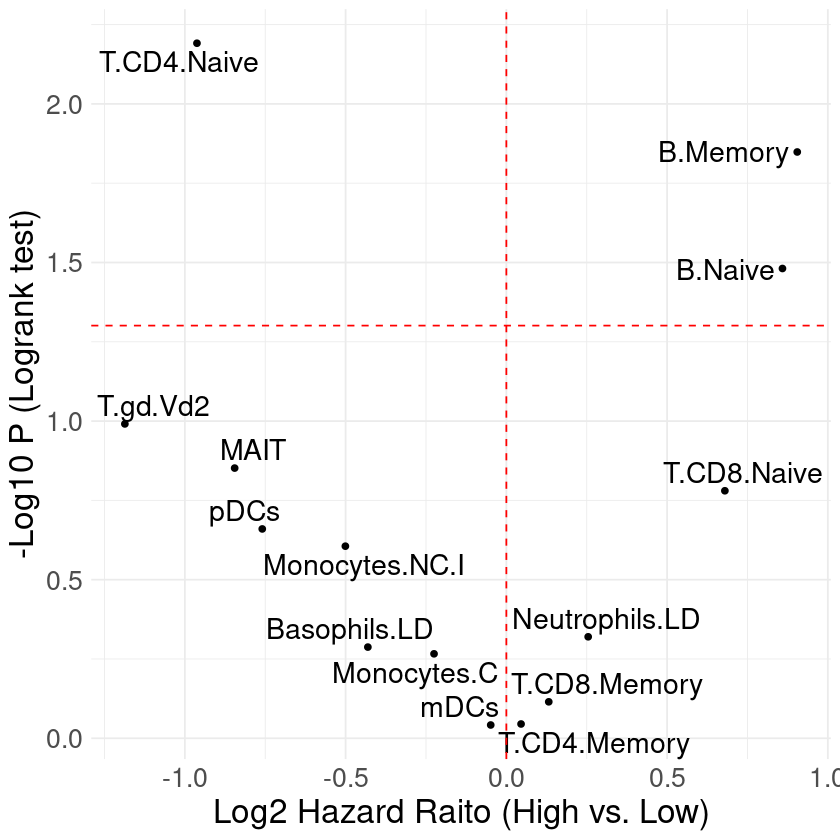

In [6]:
# remove the plasmablasts celltype, which has an extremely hight hr
p2 <- ggplot(subset(zuma_res, celltype!="Plasmablasts"), aes(
    x = log2(Hazard.Ratio),
    y = -log10(P.value..Log.rank.),
    label = celltype
)) +
    geom_point() +
    theme_minimal() +
    geom_text_repel(size = 6) +
    geom_hline(yintercept = -log10(0.05), col = "red", linetype = "dashed") +
    geom_vline(xintercept = 0, col = "red", linetype = "dashed") +
    xlab("Log2 Hazard Raito (High vs. Low)") +
    ylab("-Log10 P (Logrank test)") +
    theme(
        text = element_text(size = 20),
        axis.text = element_text(size = 16)
    )
p2

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_text_repel()`).”


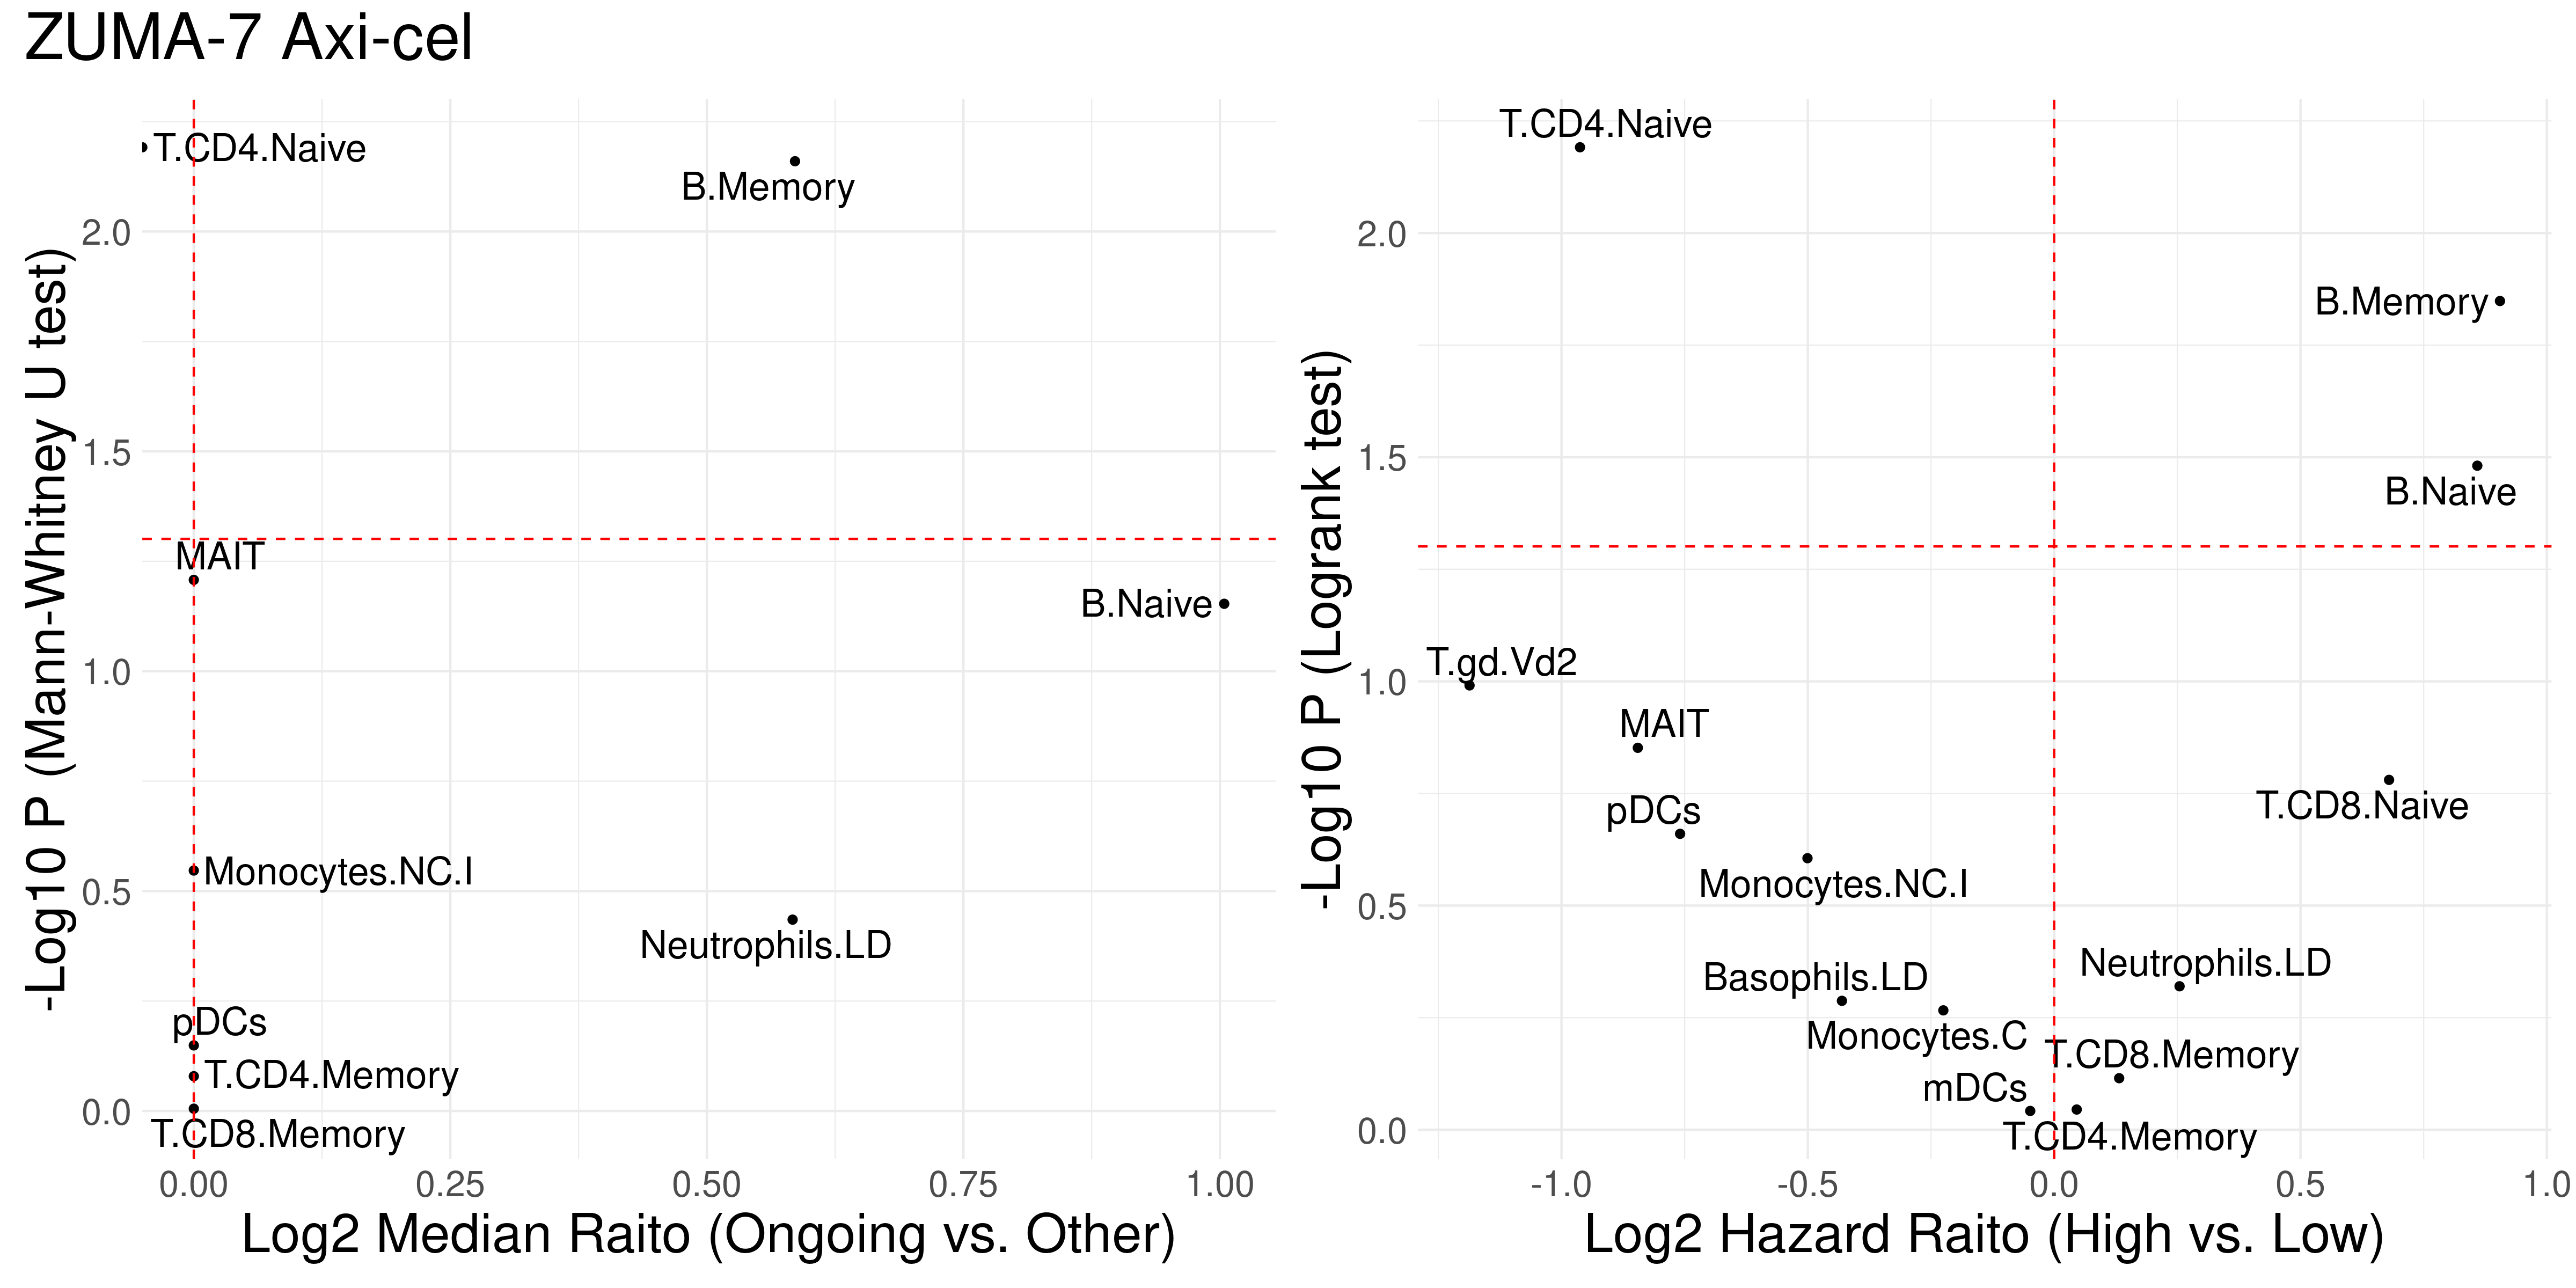

In [8]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 300)
p1+p2+plot_annotation(title="ZUMA-7 Axi-cel") & theme(title=element_text(size=24))